### **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Salma Salsabila
- **Email:** salmasylm@gmail.com
- **ID Dicoding:** salmasylm

### **Menentukan Pertanyaan Bisnis**




1. Bagaimana trend waktu penyewaan sepeda dari perbandingan Jam, Hari dan Tahun?

2. Bagaimana trend penyewaan sepeda terhadap perbedaan musim?

3. Bagaimana trend penyewaan sepeda saat Hari Kerja dan Libur Kerja?

## Import Semua Packages/Library yang Digunakan

In [25]:
file_readme = "Readme.txt" #file readme dimasukan dahulu di Google Colabs

In [26]:
with open(file_readme, "r") as file:
    file_readme = file.read()
    print(file_readme)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

## Data Wrangling

In [27]:
#Mempersiapkan Library terlebih dahulu agar nanti bisa didefinisikan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data

In [28]:
hourly_bike_df = pd.read_csv("data/hour.csv")
hourly_bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
#Mendefinisikan terlebih dahulu days_bike
days_bike_df = pd.read_csv("data/day.csv")
days_bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [30]:
days_bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [31]:
hourly_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [32]:
#Terlihat pada tabel hourly diatas terdapat anomali bahwa dteday tidak sesuai format yang menunjukan waktu maka dari object harus diganti datetime

In [33]:
days_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [34]:
#Terlihat pada tabel days diatas terdapat anomali bahwa dteday tidak sesuai format yang menunjukan waktu maka dari object harus diganti datetime

### Cleaning Data

In [35]:
hourly_bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [36]:
days_bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

In [37]:
print("Jumlah duplikasi data pada dataframe bike_day_df : ", hourly_bike_df.duplicated().sum())
print("Jumlah duplikasi data pada dataframe bike_hour_df : ", days_bike_df.duplicated().sum())

Jumlah duplikasi data pada dataframe bike_day_df :  0
Jumlah duplikasi data pada dataframe bike_hour_df :  0


### Explore Dataset

In [38]:
hourly_bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [39]:
days_bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [40]:
#Cleaning Data (UNTUK MENGGANTI FORMAT OBJECT AGAR MENJADI DATETIME)
hourly_bike_df["dteday"] = pd.to_datetime(hourly_bike_df["dteday"])
days_bike_df["dteday"] = pd.to_datetime(days_bike_df["dteday"])


In [41]:
hourly_bike_df.info() #TERLIHAT SUDAH TERGANTI OBJECT MENJADI DATETIME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [42]:
days_bike_df.info() #TERLIHAT SUDAH TERGANTI OBJECT MENJADI DATETIME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### **Visualization & Explanatory Analysis**



A. Visualization and Explanatory Analysis of Hourly_Bike_df




**1. Data Distribusi**

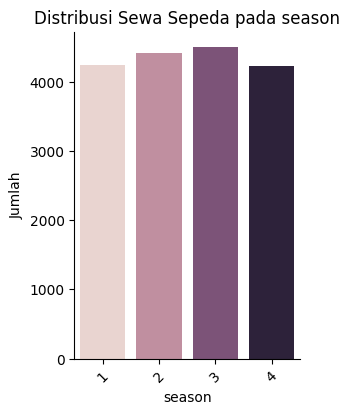

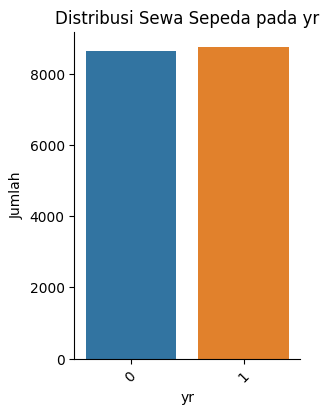

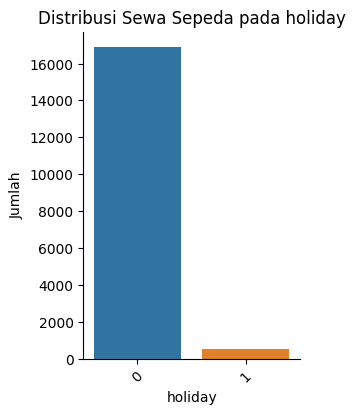

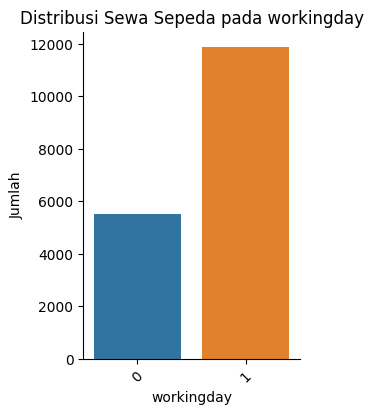

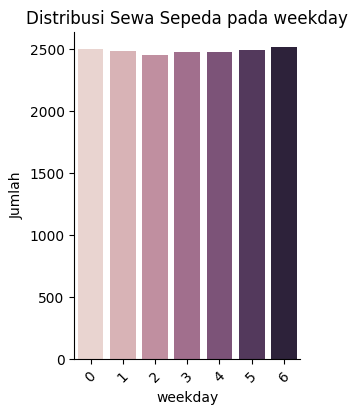

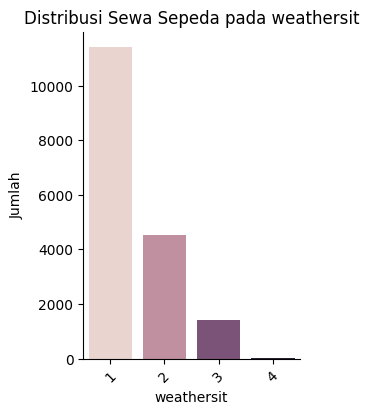

In [43]:
#1. Data Distribusi:(PADA SETIAP MUSIM)

#DATA BIKE HOURLY
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan DataFrame yang berisi data kategori
daily_categorical_data = hourly_bike_df[["season", "yr", "holiday", "workingday", "weekday", "weathersit"]]

# Menggunakan sns.catplot untuk membuat plot
for column in daily_categorical_data.columns:
    sns.catplot(x=column, hue=column, kind="count", data=daily_categorical_data,
                height=4, aspect=0.8, legend=False)
    plt.title(f"Distribusi Sewa Sepeda pada {column}")
    plt.xlabel(column)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    bar_width = 0.25
    plt.show()
#Mengganti keterangan setiap tabel
hourly_bike_df.replace({
    "season": {1: "Spring", 2: "Summer", 3: "Autumn", 4: "Winter"},
    "yr": {0: "Year 2011", 1: "Year 2012"},
    "holiday": {0: "Non-Holiday", 1: "Holiday"},
    "workingday": {0: "Non-Working Day", 1: "Working Day"},
    "weekday": {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}
}, inplace=True)

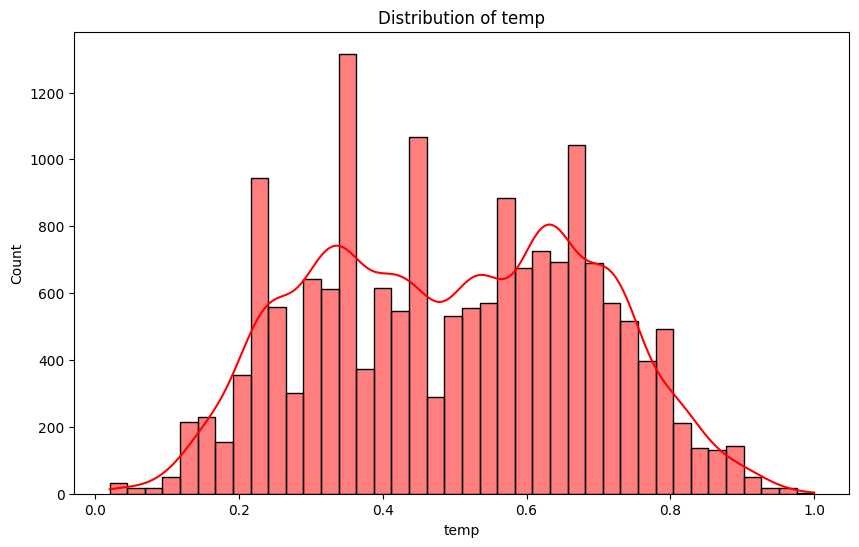

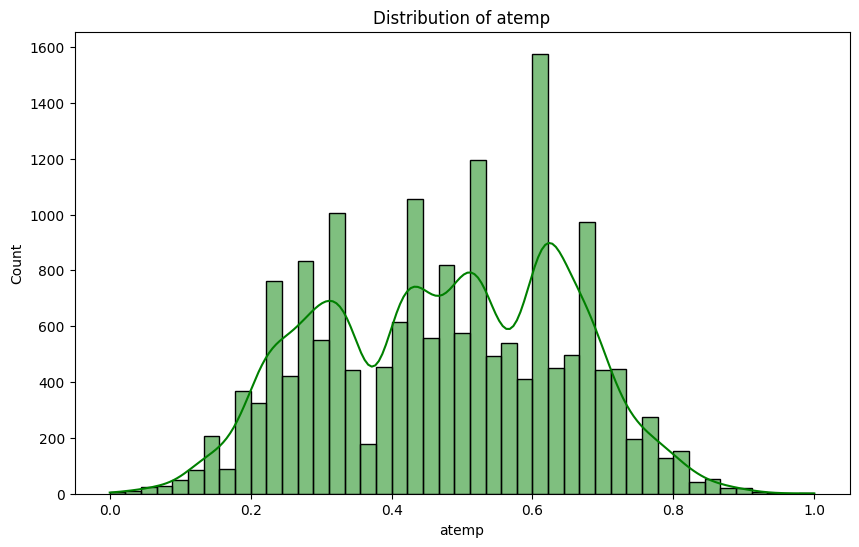

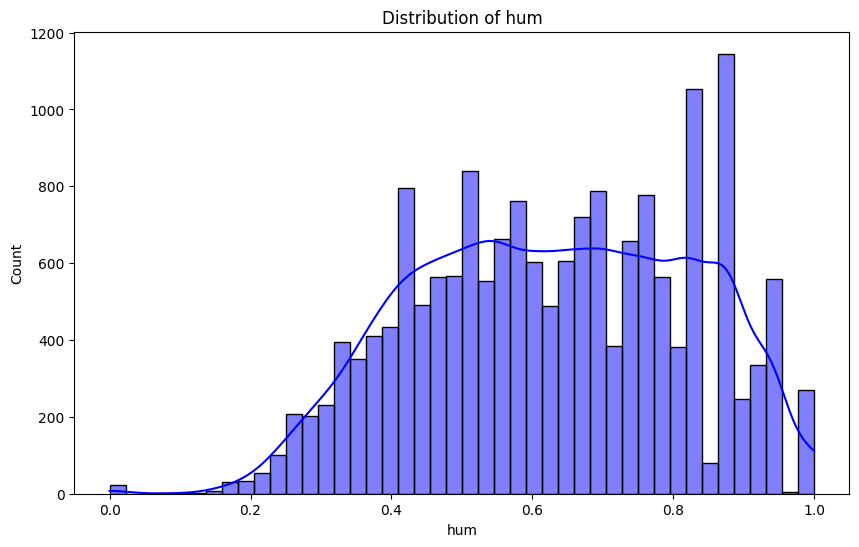

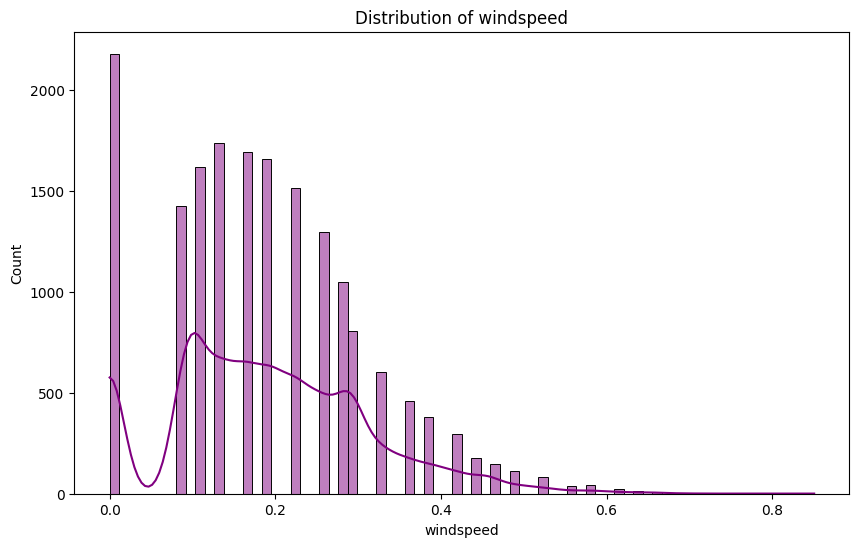

In [44]:
# Mencari grafik distribusi setiap keadaan
hourly_bike_df["temp"] = hourly_bike_df["temp"]
hourly_bike_df["atemp"] = hourly_bike_df["atemp"]
hourly_bike_df["hum"] = hourly_bike_df["hum"]
hourly_bike_df["windspeed"] = hourly_bike_df["windspeed"]

# Memberikan keadaan grafik
hourly_num_data = hourly_bike_df[["temp", "atemp", "hum", "windspeed"]]
for column in hourly_num_data.columns:
    plt.figure(figsize=(10, 6))
    # Membuat Warna yang berbeda setiap grafik
    if column == "temp":
        color = "red"
    elif column == "atemp":
        color = "green"
    elif column == "hum":
        color = "blue"
    elif column == "windspeed":
        color = "purple"

    sns.histplot(hourly_num_data, x=column, kde=True, color=color)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

**2. Data Scatter Plot untuk Analisa Temperature vs Attemperature dan Humidty vs Windspeed** [HOURLY BIKE]

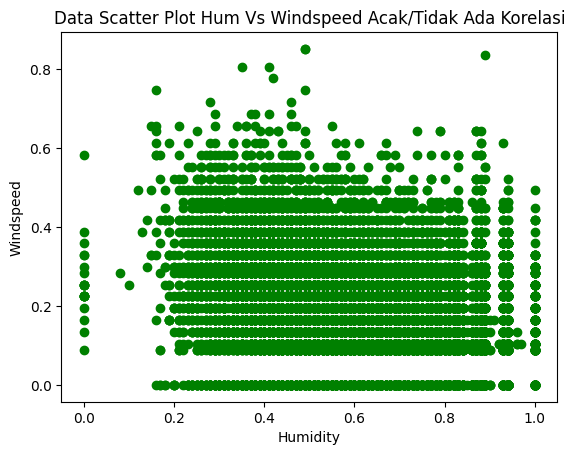

In [45]:
plt.scatter(hourly_bike_df["hum"], hourly_bike_df["windspeed"], color='green')
plt.xlabel("Humidity")
plt.ylabel("Windspeed")
plt.title("Data Scatter Plot Hum Vs Windspeed Acak/Tidak Ada Korelasi")
plt.show()

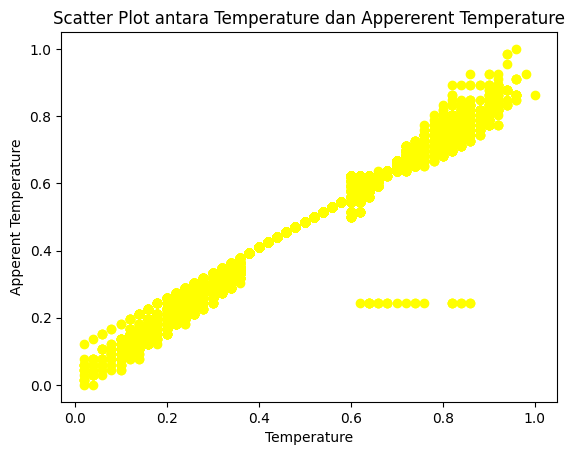

In [46]:
plt.scatter(hourly_bike_df["temp"], hourly_bike_df["atemp"], color = 'yellow')
plt.xlabel("Temperature")
plt.ylabel("Apperent Temperature")
plt.title("Scatter Plot antara Temperature dan Appererent Temperature")
plt.show()

B. Visualization and Explanatory Analysis of days_Bike_df




**1. Data Distribusi**

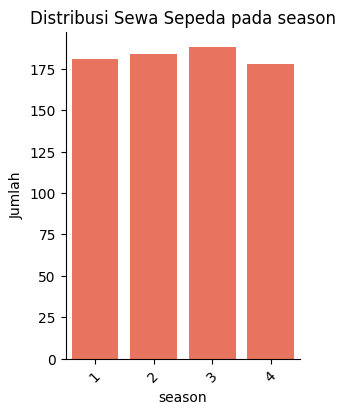

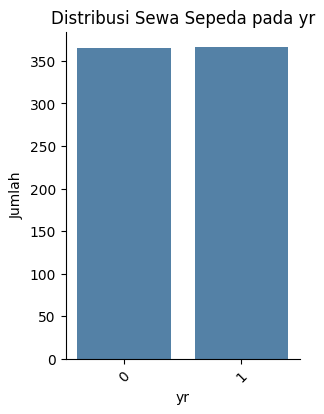

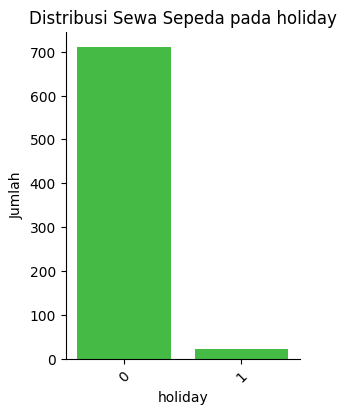

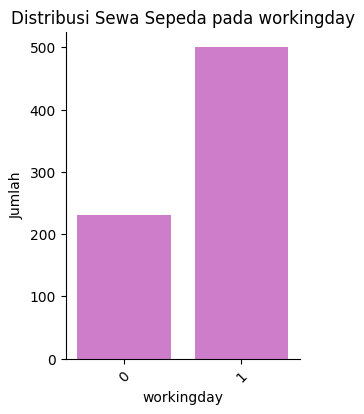

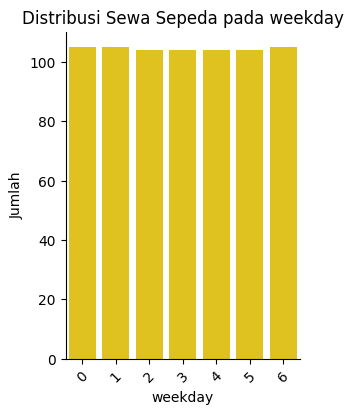

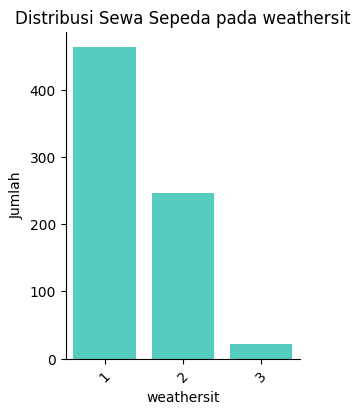

In [47]:
#PADA DATA DAYS
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan DataFrame yang berisi data kategori
daily_categorical_data = days_bike_df[["season", "yr", "holiday", "workingday", "weekday", "weathersit"]]

# Menggunakan sns.catplot untuk membuat plot
colors = ["#FF6347", "#4682B4", "#32CD32", "#DA70D6", "#FFD700", "#40E0D0"]

# Mengatur Warna dan Lebar Columns
for column, color in zip(daily_categorical_data.columns, colors):
    sns.catplot(x=column, kind="count", data=daily_categorical_data,
                height=4, aspect=0.8, legend=False, color=color)
    plt.title(f"Distribusi Sewa Sepeda pada {column}")
    plt.xlabel(column)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    plt.show()
#Mengganti keterangan setiap tabel
hourly_bike_df.replace({
    "season": {1: "Spring", 2: "Summer", 3: "Autumn", 4: "Winter"},
    "yr": {0: "Year 2011", 1: "Year 2012"},
    "holiday": {0: "Non-Holiday", 1: "Holiday"},
    "workingday": {0: "Non-Working Day", 1: "Working Day"},
    "weekday": {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}
}, inplace=True)

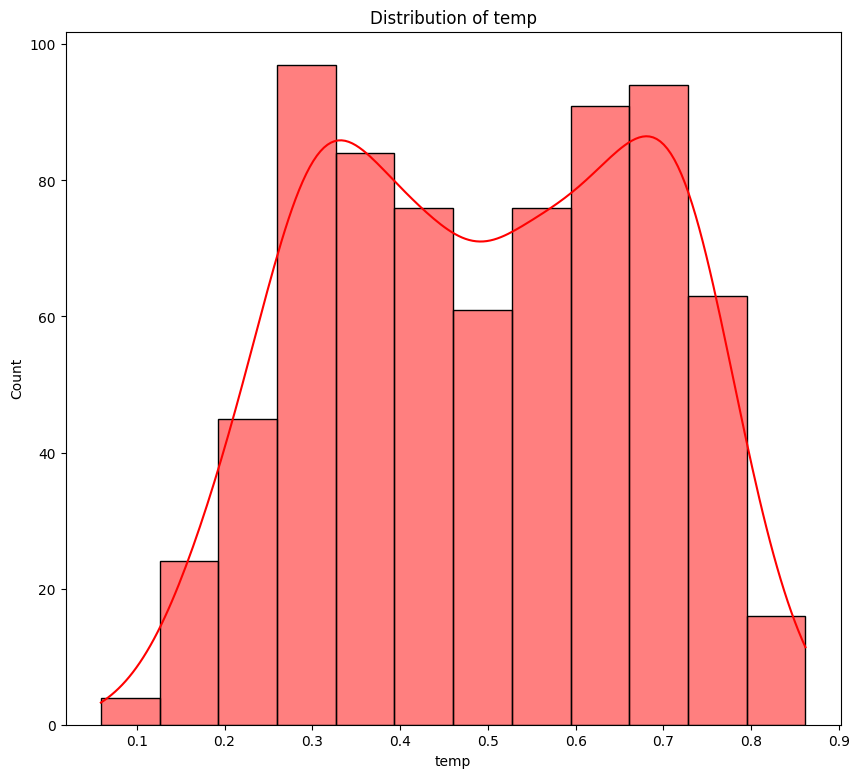

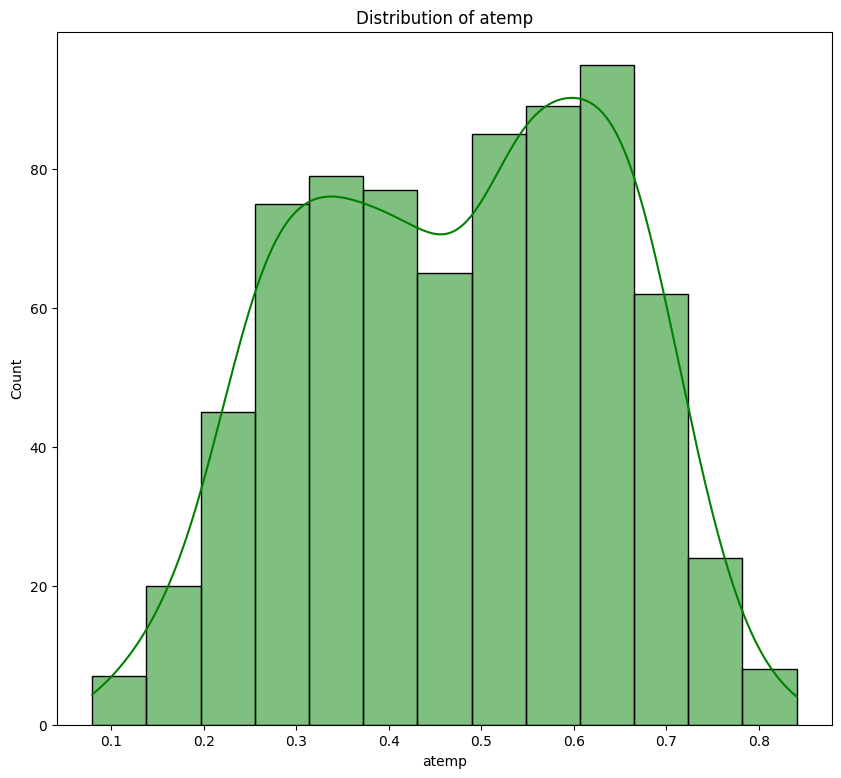

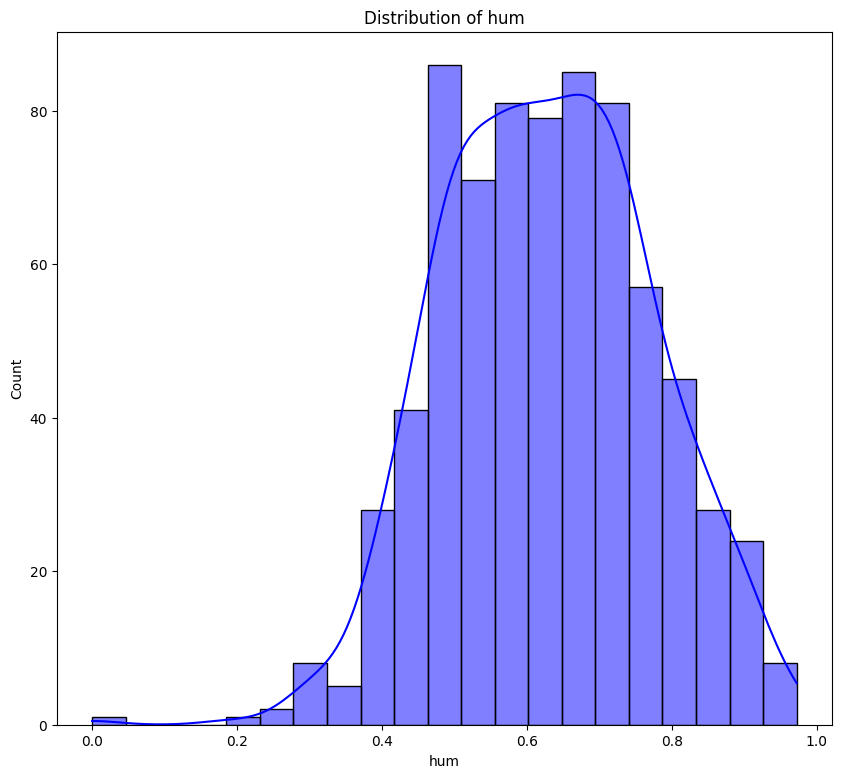

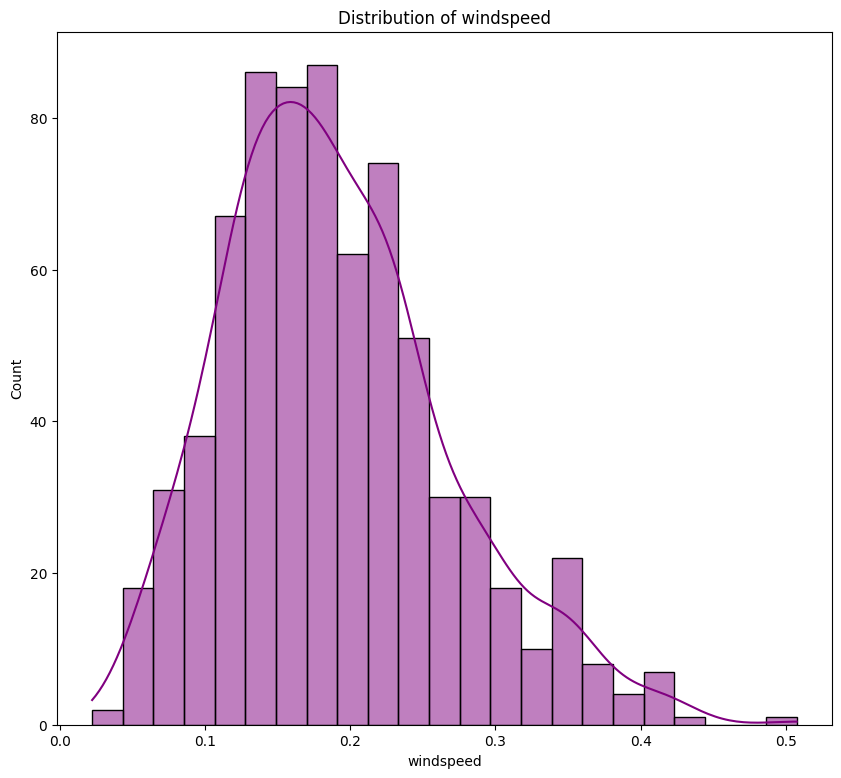

In [48]:
#Membuat persebaran masing-masing keadaan
days_bike_df["temp"] = days_bike_df["temp"]
days_bike_df["atemp"] = days_bike_df["atemp"]
days_bike_df["hum"] = days_bike_df["hum"]
days_bike_df["windspeed"] = days_bike_df["windspeed"]

# Memberikan keadaan grafik
days_num_data = days_bike_df[["temp", "atemp", "hum", "windspeed"]]

# Membuat Warna yang berbeda setiap grafik dengan dictionary
colors = {
    "temp": "red",
    "atemp": "green",
    "hum": "blue",
    "windspeed": "purple"
}

for column in days_num_data.columns:
    plt.figure(figsize=(10, 9))
    sns.histplot(days_num_data, x=column, kde=True, color=colors[column])
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

**2. Data Scatter Plot untuk Analisa Temperature vs Attemperature dan Humidty vs Windspeed** [DAYS BIKE]

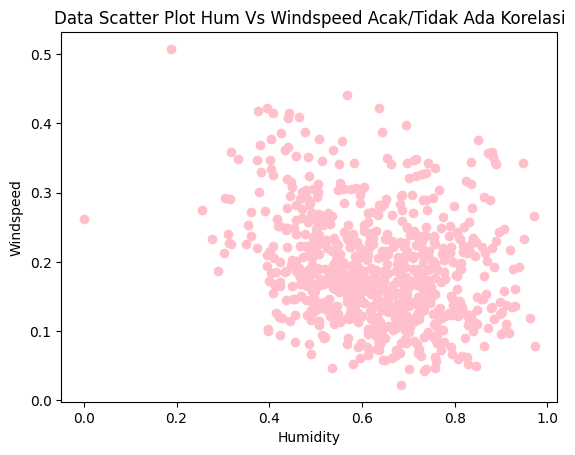

In [49]:
plt.scatter(days_bike_df["hum"], days_bike_df["windspeed"], color = 'pink')
plt.xlabel("Humidity")
plt.ylabel("Windspeed")
plt.title("Data Scatter Plot Hum Vs Windspeed Acak/Tidak Ada Korelasi")
plt.show()

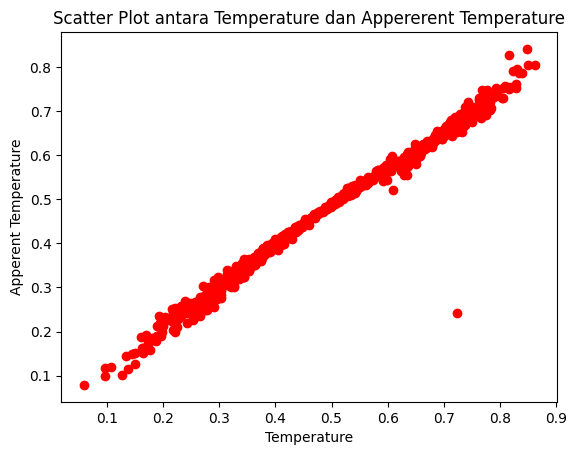

In [50]:
plt.scatter(days_bike_df["temp"], days_bike_df["atemp"], color = 'red')
plt.xlabel("Temperature")
plt.ylabel("Apperent Temperature")
plt.title("Scatter Plot antara Temperature dan Appererent Temperature")
plt.show()

## **Pertanyaan 1: Bagaimana trend waktu penyewaan sepeda dari perbandingan Jam, Hari dan Tahun?**



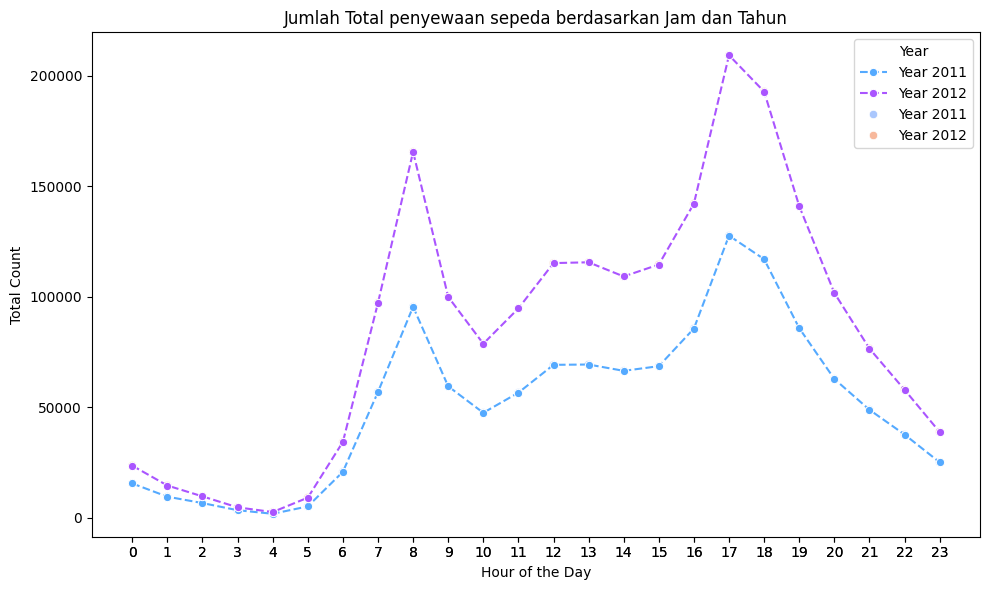

In [51]:
#Analisa Penyewaan pada Hari vs Tahun
hourly_counts = hourly_bike_df.groupby(by=["hr", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))

#Membuat Plot grafik
sns.lineplot(data=hourly_counts, x="hr", y="cnt", hue="yr", palette="cool", marker="o", linestyle="--")
sns.scatterplot(data=hourly_counts, x="hr", y="cnt", hue="yr", palette="coolwarm", marker="o")

plt.ylabel("Total Count")
plt.xlabel("Hour of the Day")
plt.title("Jumlah Total penyewaan sepeda berdasarkan Jam dan Tahun")
plt.legend(title="Year", loc="upper right")
plt.xticks(ticks=hourly_counts["hr"], labels=hourly_counts["hr"])
plt.tight_layout()
plt.show()

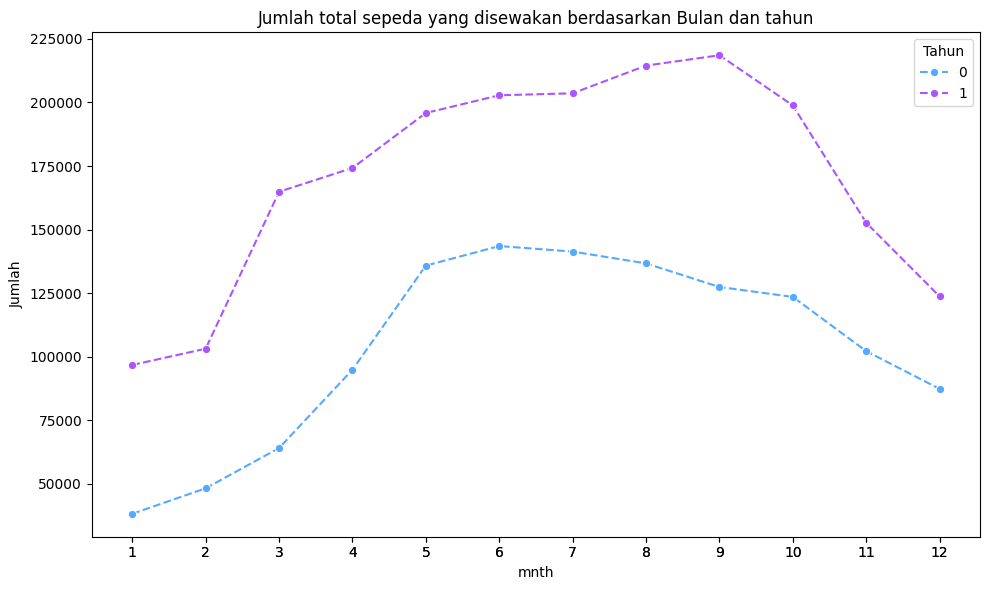

In [52]:
# Asumsikan bike_day_df adalah DataFrame yang telah didefinisikan sebelumnya
bulanan_counts = days_bike_df.groupby(by=["mnth", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))

# Menggunakan lineplot dengan palet warna 'cool' dan gaya garis putus-putus
sns.lineplot(data=bulanan_counts, x="mnth", y="cnt", hue="yr", palette="cool", linestyle='--', marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=bulanan_counts["mnth"], labels=bulanan_counts["mnth"])
plt.tight_layout()
plt.show()

# **Pertanyaan 2: Bagaimana trend penyewaan sepeda terhadap perbedaan musim?**




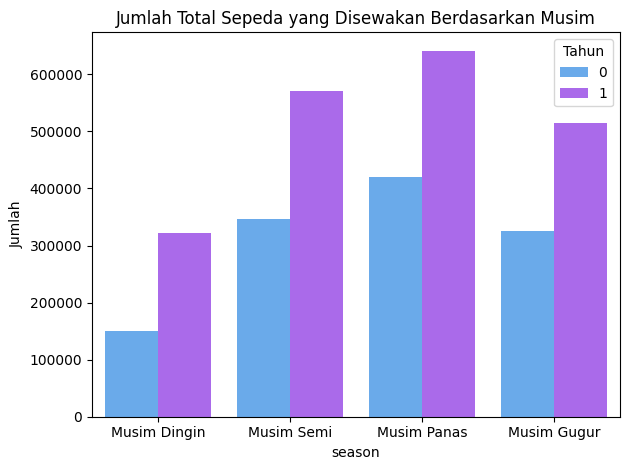

In [53]:
count_musim = days_bike_df.groupby(by=["season", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

# definisikan dan plot
sns.barplot(data=count_musim, x="season", y="cnt", hue="yr", palette="cool")

plt.ylabel("Jumlah")
plt.title("Jumlah Total Sepeda yang Disewakan Berdasarkan Musim")
plt.legend(title="Tahun", loc="upper right")
label_musim = ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur']
plt.xticks(ticks=count_musim["season"].unique() - 1, labels=label_musim)

plt.tight_layout()
plt.show()

# **Pertanyaan 3: Bagaimana trend penyewa sepeda saat Hari Kerja dan Libur Kerja?**



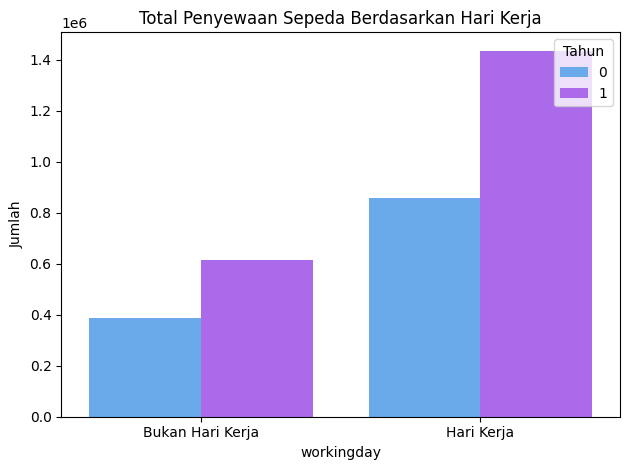

In [54]:
# Mengelompokkan data berdasarkan hari kerja dan tahun
jumlah_per_hari_kerja = days_bike_df.groupby(by=["workingday", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

# Membuat barplot
sns.barplot(data=jumlah_per_hari_kerja, x="workingday", y="cnt", hue="yr", palette="cool")

plt.ylabel("Jumlah")
plt.title("Total Penyewaan Sepeda Berdasarkan Hari Kerja")
plt.legend(title="Tahun", loc="upper right")

# Mengganti label sumbu x
plt.xticks(ticks=jumlah_per_hari_kerja["workingday"].unique(), labels=["Bukan Hari Kerja", "Hari Kerja"])

plt.tight_layout()
plt.show()

## Conclusion



*   Secara umum, terdapat peningkatan penyewaan sepeda pada jam-jam tertentu, khususnya di jam sibuk pagi dan sore hari yang berkaitan dengan aktivitas pergi dan pulang kerja atau sekolah. Penyewaan sepeda juga menunjukkan peningkatan pada akhir pekan dibandingkan hari kerja, mengindikasikan bahwa banyak orang menggunakan sepeda untuk rekreasi selain untuk transportasi sehari-hari. Dari tahun ke tahun, bisa terjadi fluktuasi dalam jumlah penyewaan sepeda yang dipengaruhi oleh berbagai faktor, termasuk kondisi cuaca, perubahan infrastruktur kota, dan tren gaya hidup sehat.
*   Pada musim panas dan musim semi, terjadi peningkatan jumlah penyewaan sepeda karena kondisi cuaca yang lebih mendukung untuk beraktivitas di luar ruangan. Sebaliknya, pada musim hujan atau musim dingin, jumlah penyewaan sepeda cenderung menurun karena kondisi cuaca yang kurang nyaman untuk bersepeda.
*   Pada hari kerja, penyewaan sepeda banyak digunakan untuk keperluan komuter, seperti pergi ke tempat kerja atau institusi pendidikan, yang terlihat dari peningkatan penyewaan pada jam-jam sibuk pagi dan sore. Sementara pada hari libur, terjadi peningkatan penyewaan sepeda yang lebih ditujukan untuk rekreasi dan kegiatan santai, seperti berkeliling kota atau taman.






In [55]:
days_bike_df.to_csv("/main_data.csv", index=False)

PermissionError: [Errno 13] Permission denied: '/main_data.csv'